# Moneyball

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import preprocessupdate
plt.style.use("seaborn")

In [13]:
mb_data = preprocessupdate.df3
mb_data.head(3)

,RS,RA,W,OBP,SLG,BA,OOBP,OSLG,Year,Team,RD,RS_Target,RA_Target,W_Target
300,851,644,99,0.341,0.433,0.282,0.314,0.392,2002,ANA,207,736.0,743.0,77.0
301,819,674,98,0.346,0.423,0.267,0.305,0.397,2002,ARI,145,717.0,685.0,84.0
302,708,565,101,0.331,0.409,0.260,0.313,0.364,2002,ATL,143,907.0,740.0,101.0


In [14]:
mb_data = mb_data.dropna(how="any")

In [15]:
mb_data.shape

(927, 14)

## Setting up the models

### Runs Scored (RS)

In [16]:
X_RS = mb_data[["OBP","SLG","BA"]]
y_RS = mb_data["RS_Target"]

In [17]:
from numpy.polynomial.polynomial import polyfit

plt.rcParams['figure.figsize'] = (23,13)

def plot_scatter(X,y,y_axis_title,n_columns):
    fig,ax = plt.subplots(nrows=1,ncols=n_columns)
    y_ax = 0
    
    for col in X.columns:
        x_sort = X[col].values
        y_sort = y.values
        ax[y_ax].scatter(x_sort,y_sort)
        ax[y_ax].set_ylabel(y_axis_title)
        ax[y_ax].set_xlabel("{}".format(col))
        y_ax += 1
        
    fig.tight_layout()
    plt.show()

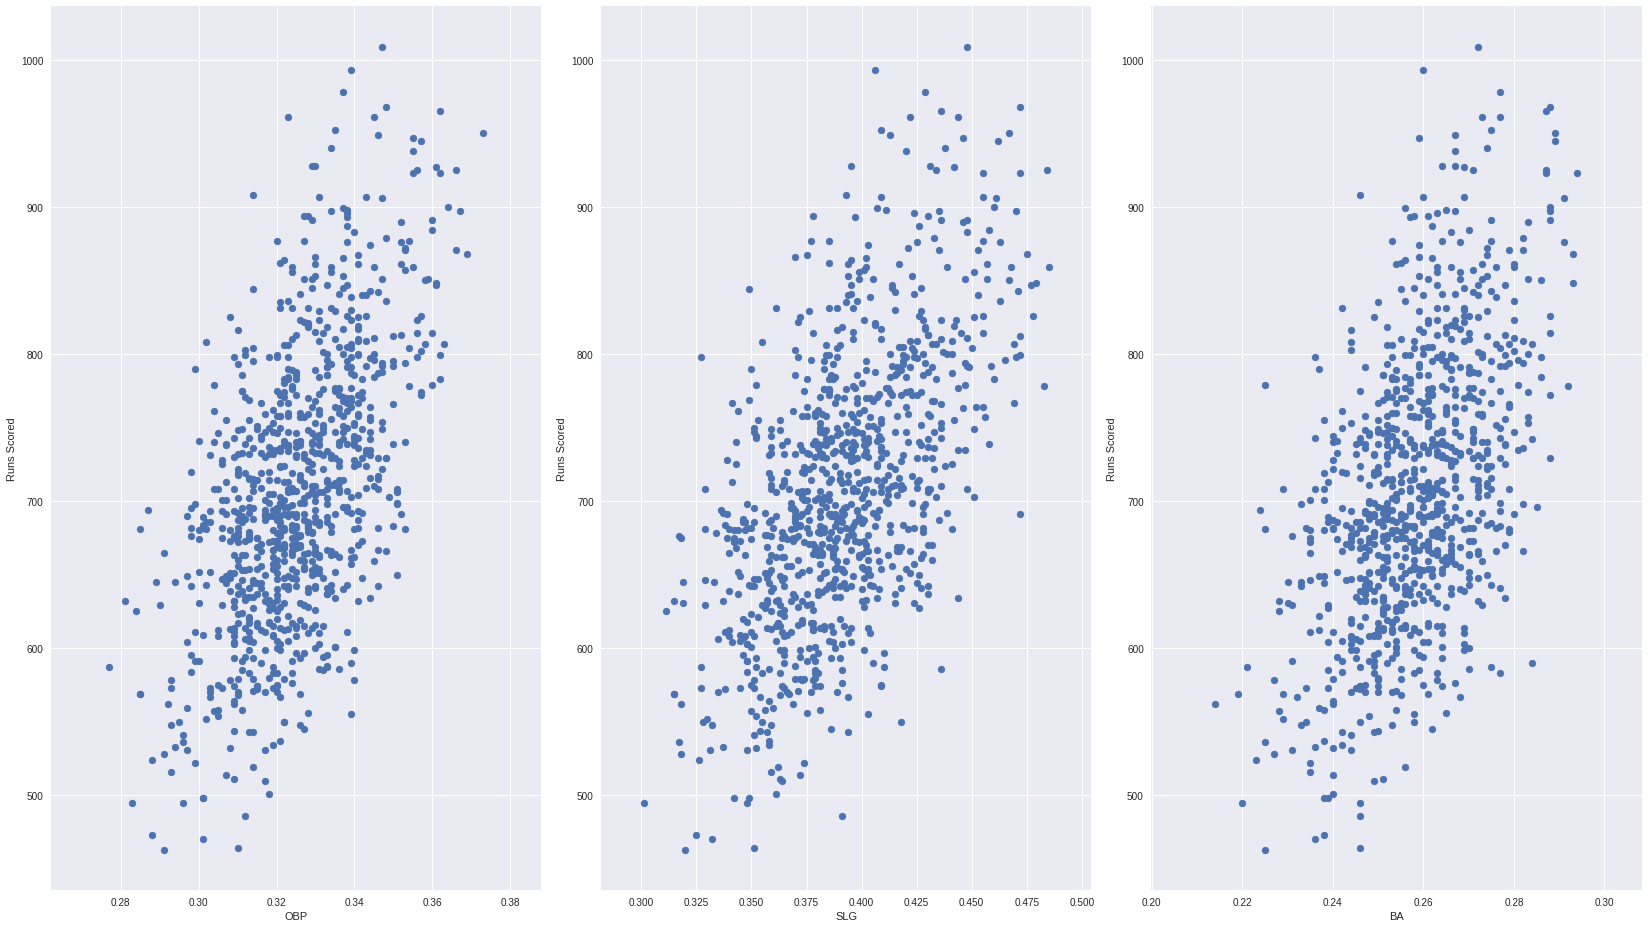

In [18]:
plot_scatter(X_RS,y_RS,"Runs Scored",3)

Appears to be a linear relationship between features and target variables. 

In [19]:
# train & test set for RS
from sklearn.model_selection import train_test_split
XRS_train,XRS_test,yRS_train,yRS_test = train_test_split(X_RS,y_RS,test_size=0.2)

In [20]:
# fit linear regression to RS dataset
from sklearn.linear_model import LinearRegression
regr_RS = LinearRegression()
regr_RS.fit(XRS_train,yRS_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
# check for multivariate normality & homoscedasticity
def linear_assump(X,X_col,regr_model,n_columns):
    actual = mb_data[X_col]
    predicted = regr_model.predict(X)
    residual = actual - predicted
    
    plt.rcParams["figure.figsize"] = (12,6)
    fig,ax = plt.subplots(nrows=1,ncols=n_columns)
    
    ax[0].hist(residual)
    ax[0].set_title("Multivariate Normality (Residual Counts)")
    ax[0].set_xlabel("Residual")
    ax[0].set_ylabel("Count")
    
    ax[1].scatter(predicted,residual)
    ax[1].set_xlabel("Predicted")
    ax[1].set_ylabel("Residual")
    #ax[1].axhline(y=0)
    ax[1].set_title("Homoscedasticity (Residual vs. Predicted)")
    
    fig.tight_layout()
    plt.show()

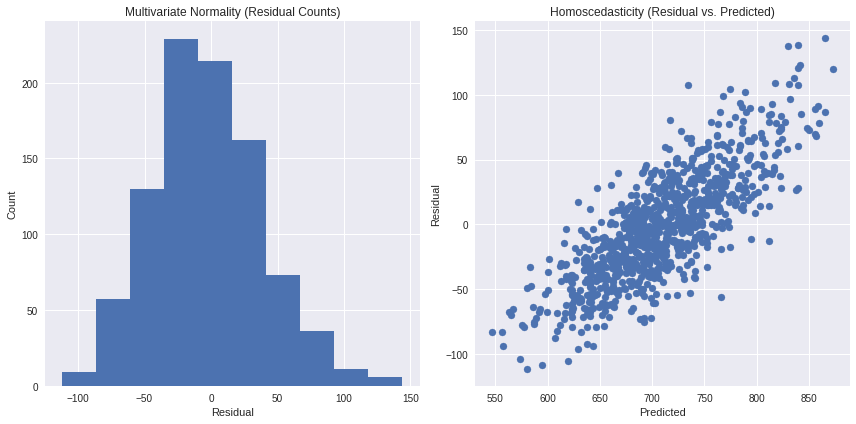

In [22]:
linear_assump(X_RS,"RS",regr_RS,2)

In [23]:
# evaluating model performance (RS)
print("Coefficients:\n",regr_RS.coef_)
print("\nIntercept:\n",regr_RS.intercept_)
print("\nR-squared:\n",regr_RS.score(XRS_test,yRS_test))

Coefficients:
 [1750.24591479 1123.64207354 -376.0421873 ]

Intercept:
 -203.90426271788317

R-squared:
 0.3841805893317391


In [24]:
from sklearn.model_selection import cross_val_score
cvs_RS = cross_val_score(estimator=regr_RS,X=X_RS,y=y_RS,cv=10)
print(cvs_RS)

[ 0.27211885 -0.16207555 -0.02870229 -0.08062732  0.10257833  0.18255928
  0.09005818  0.07172462  0.0180806   0.01497588]


In [25]:
# testing individual parameters
import statsmodels.formula.api as sm
linear_formula_RS = 'RS_Target ~ OBP + SLG + BA'
lm_RS = sm.ols(formula=linear_formula_RS,data=mb_data).fit()

In [26]:
# check p-values for features and target variable, if p-value > 0.05 drop feature
lm_RS.pvalues

Intercept    1.626442e-04
OBP          1.607466e-07
SLG          1.009445e-15
BA           5.033321e-01
dtype: float64

In [27]:
# seems BA has a p-value > 0.05, try dropping BA and re-testing model performance
X_RS = mb_data[["OBP","SLG"]]
XRS_train,XRS_test,yRS_train,yRS_test = train_test_split(X_RS,y_RS,test_size=0.2)
regr_RS.fit(XRS_train,yRS_train)
print("Coefficients:\n",regr_RS.coef_)
print("\nIntercept:\n",regr_RS.intercept_)
print("\nR-squared:\n",regr_RS.score(XRS_test,yRS_test))
cvs = cross_val_score(estimator=regr_RS,X=X_RS,y=y_RS,cv=10)
print("\nCross Valuation Scores:\n",cvs)

Coefficients:
 [1610.5599579  1059.95214183]

Intercept:
 -226.95734572280276

R-squared:
 0.30821743534841806

Cross Valuation Scores:
 [ 0.27238607 -0.16387797 -0.02547072 -0.08402504  0.10034546  0.18589424
  0.10596667  0.07104372  0.0305527   0.02192785]


### Runs Allowed (RA)

In [28]:
X_RA = mb_data[["OOBP","OSLG"]]
y_RA = mb_data["RA_Target"]

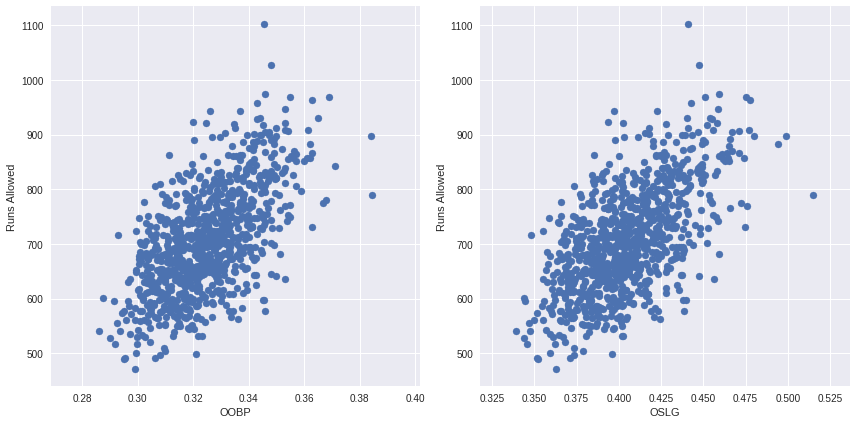

In [29]:
plot_scatter(X_RA,y_RA,"Runs Allowed",2)

In [30]:
# train & test RA data
XRA_train,XRA_test,yRA_train,yRA_test = train_test_split(X_RA,y_RA,test_size=0.2)

In [31]:
# fit linear model to RA
regr_RA = LinearRegression()
regr_RA.fit(XRA_train,yRA_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

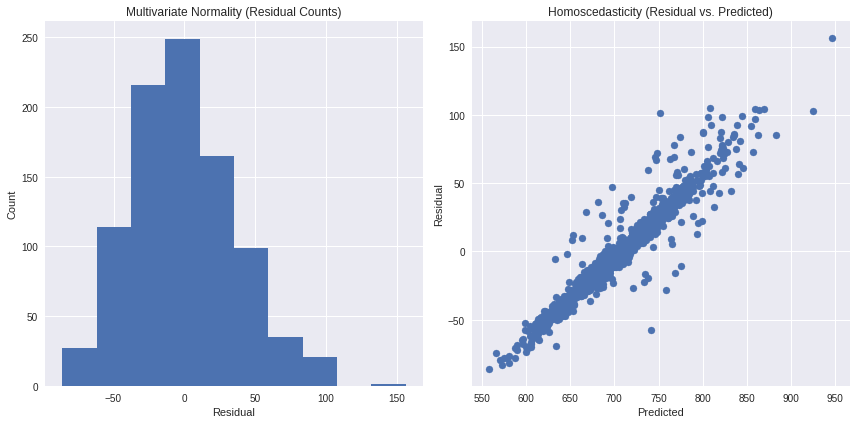

In [32]:
# check for multivariate normality & homoscedasticity
linear_assump(X_RA,"RA",regr_RA,2)

In [33]:
# evaluating model performance (RA)
print("Coefficients:\n",regr_RA.coef_)
print("\nIntercept:\n",regr_RA.intercept_)
print("\nR-squared:\n",regr_RA.score(XRA_test,yRA_test))

Coefficients:
 [1632.5913036  1298.62351311]

Intercept:
 -349.61320092478365

R-squared:
 0.40970764562174167


In [34]:
cvs_RA = cross_val_score(estimator=regr_RA,X=X_RA,y=y_RA,cv=10)
print(cvs_RA)

[ 0.43719486 -0.16457929  0.06971183 -0.04199048  0.20251988  0.20783081
  0.01887179  0.1195992  -0.220034    0.053531  ]


In [35]:
linear_formula_RA = 'RA_Target ~ OOBP + OSLG'
lm_RA = sm.ols(formula=linear_formula_RA,data=mb_data).fit()

In [36]:
lm_RA.pvalues

Intercept    3.563120e-07
OOBP         1.384286e-03
OSLG         9.568344e-03
dtype: float64

### Wins (W)

In [37]:
X_W = mb_data[["RD"]]
y_W = mb_data["W_Target"]

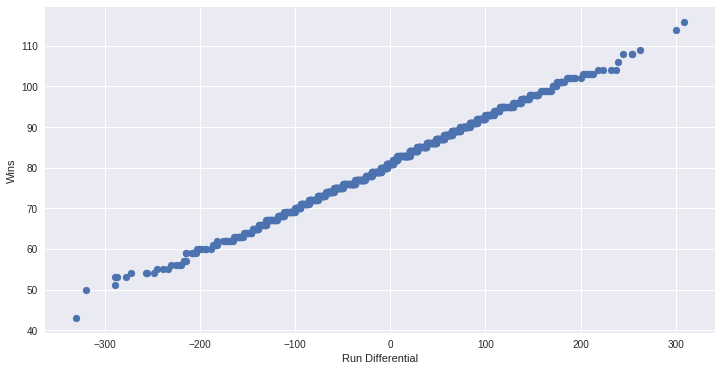

In [38]:
x_sort = sorted(X_W.values)
y_sort = sorted(y_W.values)
plt.scatter(x_sort,y_sort)
plt.ylabel("Wins")
plt.xlabel("Run Differential")
plt.show()

In [39]:
# create train and test set for W
XW_train,XW_test,yW_train,yW_test = train_test_split(X_W,y_W,test_size=0.2)

In [40]:
# fit linear regression to W dataset
regr_W = LinearRegression()
regr_W.fit(XW_train,yW_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

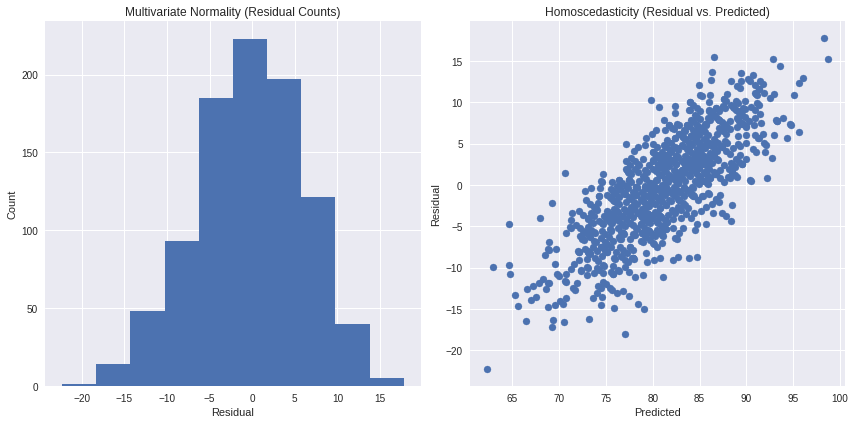

In [41]:
# check for multivariate normality & homoscedasticity
linear_assump(X_W,"W",regr_W,2)

In [42]:
# evaluating model performance (W)
print("Coefficients:\n",regr_W.coef_)
print("\nIntercept:\n",regr_W.intercept_)
print("\nR-squared:\n",regr_W.score(XW_test,yW_test))

Coefficients:
 [0.05694934]

Intercept:
 81.13881509443958

R-squared:
 0.31169491936928717


In [43]:
cvs_W = cross_val_score(estimator=regr_W,X=X_W,y=y_W,cv=10)
print(cvs_W)

[ 0.43027773  0.27318133 -0.16732253  0.07925063  0.08280479  0.08799951
  0.36013844  0.42159249  0.25131434  0.49591699]


## Making Predictions

### Runs Scored (RS)

In [44]:
RS_pred = regr_RS.predict(XRS_test)
RS_comp = pd.DataFrame({'Actual':yRS_test,'Predicted':RS_pred})
RS_comp.head(5)

,Actual,Predicted
639,708.0,644.786260
826,545.0,708.837287
395,764.0,748.096780
869,738.0,731.178809
1081,687.0,652.839060


In [45]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(yRS_test, RS_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(yRS_test, RS_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yRS_test, RS_pred)))  

Mean Absolute Error: 62.620578924622485
Mean Squared Error: 5888.7241964739005
Root Mean Squared Error: 76.738023146768


### Runs Allowed (RA)

In [46]:
RA_pred = regr_RA.predict(XRA_test)
RA_comp = pd.DataFrame({'Actual':yRA_test,'Predicted':RA_pred})
RA_comp.head(5)

,Actual,Predicted
603,776.0,619.161397
499,760.0,783.658875
711,801.0,786.612019
886,581.0,649.433029
1177,613.0,695.823773


In [47]:
print('Mean Absolute Error:', metrics.mean_absolute_error(yRA_test, RA_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(yRA_test, RA_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yRA_test, RA_pred)))  

Mean Absolute Error: 56.00592271705758
Mean Squared Error: 4885.245124130712
Root Mean Squared Error: 69.89452857077377


### Wins (W)

In [48]:
W_pred = regr_W.predict(XW_test)
W_comp = pd.DataFrame({'Actual':yW_test,'Predicted':W_pred})
W_comp.head(5)

,Actual,Predicted
349,103.0,86.321205
940,100.0,89.965962
604,78.0,76.412020
1154,80.0,78.746943
709,80.0,79.031690


In [49]:
print('Mean Absolute Error:', metrics.mean_absolute_error(yW_test, W_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(yW_test, W_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yW_test, W_pred)))  

Mean Absolute Error: 7.685795736640544
Mean Squared Error: 88.98436174854656
Root Mean Squared Error: 9.43315226997564


## Improving predictions with other regression models

### Support Vector Regression (SVR)

In [50]:
from sklearn.preprocessing import StandardScaler
# RS
sc_rsx = StandardScaler()
rsx_scale = sc_rsx.fit_transform(X_RS)
sc_rsy = StandardScaler()
rsy_scale = sc_rsy.fit_transform(y_RS.values.reshape(-1,1))

# RA
sc_rax = StandardScaler()
rax_scale = sc_rax.fit_transform(X_RA)
sc_ray = StandardScaler()
ray_scale = sc_ray.fit_transform(y_RA.values.reshape(-1,1))

# W
sc_rwx = StandardScaler()
rwx_scale = sc_rwx.fit_transform(X_W)
sc_rwy = StandardScaler()
rwy_scale = sc_rwy.fit_transform(y_W.values.reshape(-1,1))

In [51]:
from sklearn.svm import SVR
# RS
svr_RS = SVR()
svr_RS.fit(rsx_scale,rsy_scale.ravel())

# RA
svr_RA = SVR()
svr_RA.fit(rax_scale,ray_scale.ravel())

# W
svr_W = SVR()
svr_W.fit(rwx_scale,rwy_scale.ravel())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [52]:
print("RS Cross Validation Score:\n",cross_val_score(svr_RS,rsx_scale,rsy_scale.ravel(),cv=6))
print("\nRA Cross Validation Score:\n",cross_val_score(svr_RA,rax_scale,ray_scale.ravel(),cv=6))
print("\nW Cross Validation Score:\n",cross_val_score(svr_W,rwx_scale,rwy_scale.ravel(),cv=6))

RS Cross Validation Score:
 [-0.04187265  0.12356149  0.09493987  0.1831509   0.0535214  -0.16132131]

RA Cross Validation Score:
 [ 0.10839661  0.12395082  0.13870686  0.06409789 -0.00966079  0.01408708]

W Cross Validation Score:
 [ 0.37809505 -0.08810711  0.09811225  0.23475908  0.36190111  0.38564962]


In [53]:
print("RS (R^2): ",svr_RS.score(rsx_scale,rsy_scale.ravel()))
print("\nRA (R^2): ",svr_RA.score(rax_scale,ray_scale.ravel()))
print("\nW (R^2): ",svr_W.score(rwx_scale,rwy_scale.ravel()))

RS (R^2):  0.3877547845332512

RA (R^2):  0.3919273106741844

W (R^2):  0.2682119896016696


In [54]:
svr_RS_pred = sc_rsy.inverse_transform(svr_RS.predict(rsx_scale))
svr_RA_pred = sc_ray.inverse_transform(svr_RA.predict(rax_scale))
svr_W_pred = sc_rwy.inverse_transform(svr_W.predict(rwx_scale))

In [55]:
svr_RS_comp = pd.DataFrame({'Actual':y_RS,'Predicted':svr_RS_pred})
svr_RS_comp.head(5)

,Actual,Predicted
300,736.0,767.475194
301,717.0,764.730578
302,907.0,726.722524
303,743.0,703.261294
304,961.0,780.144956


In [56]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_RS, svr_RS_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_RS, svr_RS_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_RS, svr_RS_pred)))  

Mean Absolute Error: 57.68416212679752
Mean Squared Error: 5326.126636021601
Root Mean Squared Error: 72.98031677117879


### Tuning SVR hyperparameters for better performance

In [57]:
from sklearn.model_selection import RandomizedSearchCV

# Penalty parameter of the error term
c_param = [int(x) for x in np.linspace(start=1,stop=10000,num=10)]
# Kernel type to be used in algorithm
kernel_param = ["linear","rbf","poly"]
# Kernel coefficient (gamma)
gamma_param = [int(x) for x in np.linspace(start=0.0001,stop=1,num=10)]

# Create random grid
random_grid = {
    "C":c_param,
    "kernel":kernel_param,
    "gamma":gamma_param
}

In [58]:
# Search for best hyperparameters, using 3-fold cross validation (start with RS)

svr_random = RandomizedSearchCV(estimator=svr_RS,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,random_state=42,n_jobs=-1)
svr_random.fit(rsx_scale,rsy_scale.ravel())

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] kernel=poly, gamma=0, C=8889 ....................................
[CV] kernel=poly, gamma=0, C=5556 ....................................
[CV] kernel=poly, gamma=0, C=5556 ....................................
[CV] kernel=poly, gamma=0, C=6667 ....................................
[CV] kernel=poly, gamma=0, C=6667 ....................................
[CV] kernel=poly, gamma=0, C=6667 ....................................
[CV] kernel=poly, gamma=0, C=8889 ....................................
[CV] ..................... kernel=poly, gamma=0, C=5556, total=   0.0s
[CV] ..................... kernel=poly, gamma=0, C=6667, total=   0.0s
[CV] ..................... kernel=poly, gamma=0, C=8889, total=   0.0s
[CV] kernel=linear, gamma=0, C=1 .....................................
[CV] kernel=poly, gamma=0, C=8889 ....................................
[CV] kernel=poly, gamma=0, C=5556 ....................................
[CV] .........

[CV] kernel=linear, gamma=0, C=1112 ..................................
[CV] ...................... kernel=rbf, gamma=1, C=4445, total=   6.6s
[CV] kernel=rbf, gamma=1, C=4445 .....................................
[CV] ................... kernel=linear, gamma=1, C=1112, total=   2.9s
[CV] kernel=poly, gamma=0, C=7778 ....................................
[CV] ..................... kernel=poly, gamma=0, C=7778, total=   0.0s
[CV] kernel=poly, gamma=0, C=7778 ....................................
[CV] ..................... kernel=poly, gamma=0, C=7778, total=   0.0s
[CV] kernel=poly, gamma=0, C=7778 ....................................
[CV] ..................... kernel=poly, gamma=0, C=7778, total=   0.0s
[CV] kernel=linear, gamma=0, C=1112 ..................................
[CV] ................... kernel=linear, gamma=0, C=1112, total=   3.3s
[CV] kernel=poly, gamma=0, C=6667 ....................................
[CV] ..................... kernel=poly, gamma=0, C=6667, total=   0.0s
[CV] k

[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:   18.8s


[CV] ................... kernel=linear, gamma=0, C=5556, total=  20.0s
[CV] kernel=linear, gamma=0, C=5556 ..................................
[CV] ................... kernel=linear, gamma=1, C=7778, total=  22.6s
[CV] kernel=linear, gamma=1, C=7778 ..................................
[CV] ...................... kernel=rbf, gamma=1, C=7778, total=   8.4s
[CV] kernel=poly, gamma=0, C=1 .......................................
[CV] ........................ kernel=poly, gamma=0, C=1, total=   0.0s
[CV] kernel=poly, gamma=0, C=1 .......................................
[CV] ........................ kernel=poly, gamma=0, C=1, total=   0.0s
[CV] kernel=poly, gamma=0, C=1 .......................................
[CV] ........................ kernel=poly, gamma=0, C=1, total=   0.0s
[CV] kernel=poly, gamma=0, C=5556 ....................................
[CV] ..................... kernel=poly, gamma=0, C=5556, total=   0.0s
[CV] kernel=rbf, gamma=0, C=2223 .....................................
[CV] .

[CV] ...................... kernel=rbf, gamma=0, C=7778, total=   0.0s
[CV] kernel=linear, gamma=1, C=10000 .................................
[CV] ................... kernel=linear, gamma=0, C=4445, total=  14.0s
[CV] kernel=poly, gamma=1, C=7778 ....................................
[CV] ................... kernel=linear, gamma=0, C=2223, total=   9.7s
[CV] kernel=linear, gamma=0, C=2223 ..................................
[CV] ................... kernel=linear, gamma=0, C=2223, total=   6.5s
[CV] kernel=linear, gamma=1, C=10000 .................................
[CV] ................... kernel=linear, gamma=0, C=6667, total=  20.3s
[CV] kernel=linear, gamma=0, C=4445 ..................................
[CV] ................... kernel=linear, gamma=0, C=7778, total=  24.4s
[CV] kernel=linear, gamma=0, C=6667 ..................................
[CV] ................... kernel=linear, gamma=0, C=4445, total=  12.7s
[CV] kernel=poly, gamma=0, C=10000 ...................................
[CV] .

[CV] ................... kernel=linear, gamma=0, C=4445, total=  17.5s
[CV] kernel=poly, gamma=0, C=7778 ....................................
[CV] ..................... kernel=poly, gamma=0, C=7778, total=   0.0s
[CV] kernel=poly, gamma=0, C=7778 ....................................
[CV] ..................... kernel=poly, gamma=0, C=7778, total=   0.0s
[CV] kernel=poly, gamma=0, C=7778 ....................................
[CV] ..................... kernel=poly, gamma=0, C=7778, total=   0.0s
[CV] kernel=rbf, gamma=0, C=6667 .....................................
[CV] ...................... kernel=rbf, gamma=0, C=6667, total=   0.0s
[CV] kernel=rbf, gamma=0, C=6667 .....................................
[CV] ...................... kernel=rbf, gamma=0, C=6667, total=   0.0s
[CV] kernel=rbf, gamma=0, C=6667 .....................................
[CV] ...................... kernel=rbf, gamma=0, C=6667, total=   0.0s
[CV] kernel=linear, gamma=0, C=4445 ..................................
[CV] .

[CV] ..................... kernel=poly, gamma=0, C=3334, total=   0.0s
[CV] kernel=poly, gamma=0, C=3334 ....................................
[CV] ..................... kernel=poly, gamma=0, C=3334, total=   0.0s
[CV] kernel=poly, gamma=0, C=3334 ....................................
[CV] ..................... kernel=poly, gamma=0, C=3334, total=   0.0s
[CV] kernel=poly, gamma=0, C=2223 ....................................
[CV] ..................... kernel=poly, gamma=0, C=2223, total=   0.0s
[CV] kernel=poly, gamma=0, C=2223 ....................................
[CV] ..................... kernel=poly, gamma=0, C=2223, total=   0.0s
[CV] kernel=poly, gamma=0, C=2223 ....................................
[CV] ..................... kernel=poly, gamma=0, C=2223, total=   0.0s
[CV] kernel=poly, gamma=0, C=7778 ....................................
[CV] ..................... kernel=poly, gamma=0, C=7778, total=   0.0s
[CV] kernel=poly, gamma=0, C=7778 ....................................
[CV] .

[Parallel(n_jobs=-1)]: Done 261 tasks      | elapsed:  6.5min


[CV] ...................... kernel=rbf, gamma=0, C=1112, total=   0.0s
[CV] kernel=rbf, gamma=0, C=1112 .....................................
[CV] ...................... kernel=rbf, gamma=0, C=1112, total=   0.0s
[CV] kernel=rbf, gamma=0, C=1 ........................................
[CV] ......................... kernel=rbf, gamma=0, C=1, total=   0.0s
[CV] kernel=rbf, gamma=0, C=1 ........................................
[CV] ......................... kernel=rbf, gamma=0, C=1, total=   0.0s
[CV] kernel=rbf, gamma=0, C=1 ........................................
[CV] ......................... kernel=rbf, gamma=0, C=1, total=   0.0s
[CV] kernel=poly, gamma=1, C=5556 ....................................
[CV] ................... kernel=linear, gamma=0, C=2223, total=   5.7s
[CV] kernel=poly, gamma=1, C=5556 ....................................
[CV] ................... kernel=linear, gamma=0, C=2223, total=   6.8s
[CV] kernel=poly, gamma=1, C=5556 ....................................
[CV] .

[Parallel(n_jobs=-1)]: Done 285 out of 300 | elapsed:  7.5min remaining:   23.8s


[CV] ..................... kernel=poly, gamma=1, C=3334, total=10.7min
[CV] kernel=poly, gamma=1, C=3334 ....................................
[CV] ..................... kernel=poly, gamma=1, C=7778, total= 9.5min
[CV] ..................... kernel=poly, gamma=1, C=5556, total= 6.3min
[CV] ..................... kernel=poly, gamma=1, C=5556, total= 7.2min
[CV] ..................... kernel=poly, gamma=1, C=3334, total= 4.4min
[CV] kernel=rbf, gamma=0, C=1 ........................................
[CV] ......................... kernel=rbf, gamma=0, C=1, total=   0.0s
[CV] kernel=rbf, gamma=0, C=1 ........................................
[CV] ......................... kernel=rbf, gamma=0, C=1, total=   0.0s
[CV] kernel=rbf, gamma=0, C=1 ........................................
[CV] ......................... kernel=rbf, gamma=0, C=1, total=   0.0s
[CV] kernel=linear, gamma=0, C=3334 ..................................
[CV] ................... kernel=linear, gamma=0, C=3334, total=   7.6s
[CV] .

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 25.4min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'C': [1, 1112, 2223, 3334, 4445, 5556, 6667, 7778, 8889, 10000], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [59]:
svr_random.best_params_

{'C': 5556, 'gamma': 0, 'kernel': 'linear'}